# Arbres de Décisions

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/decision-trees.ipynb)

In [35]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

X, y = make_classification(
    n_features=2,
    n_samples=500,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=.9,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=random_state,
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

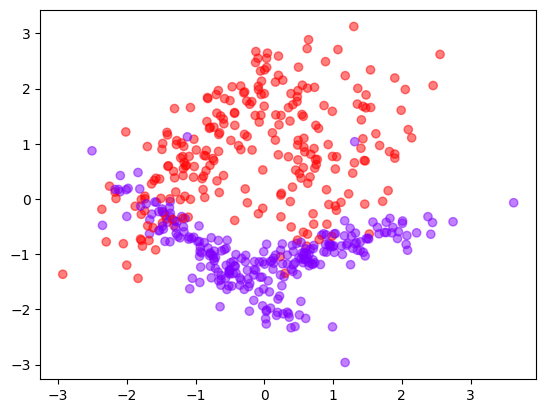

In [37]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap=plt.cm.rainbow)

## Arbres de Décisions avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=3, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.925
Test accuracy: 0.86


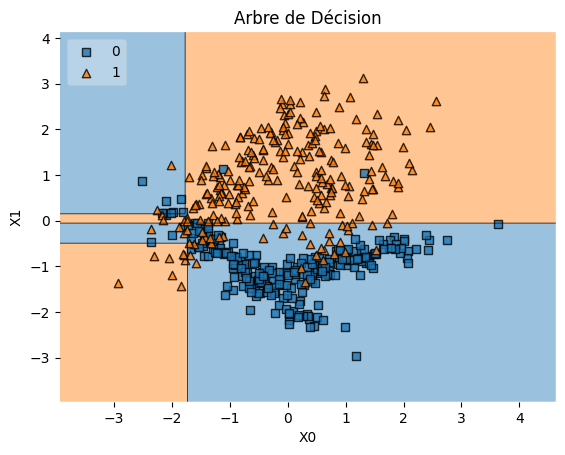

In [39]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Arbres de Décisions')
plt.show()

[Text(0.5, 0.875, 'x[1] <= -0.051\ngini = 0.499\nsamples = 400\nvalue = [208, 192]'),
 Text(0.25, 0.625, 'x[1] <= -0.486\ngini = 0.24\nsamples = 230\nvalue = [198, 32]'),
 Text(0.125, 0.375, 'x[0] <= -1.722\ngini = 0.139\nsamples = 187\nvalue = [173.0, 14.0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.1875, 0.125, 'gini = 0.084\nsamples = 181\nvalue = [173, 8]'),
 Text(0.375, 0.375, 'x[0] <= 1.521\ngini = 0.487\nsamples = 43\nvalue = [25, 18]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 36\nvalue = [18, 18]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.625, 'x[0] <= -1.774\ngini = 0.111\nsamples = 170\nvalue = [10, 160]'),
 Text(0.625, 0.375, 'x[1] <= 0.146\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6875, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.875, 0.375, 'x[0] <= 1.313\ngini = 0.025\nsamples = 158\nvalue = [2, 156]'),


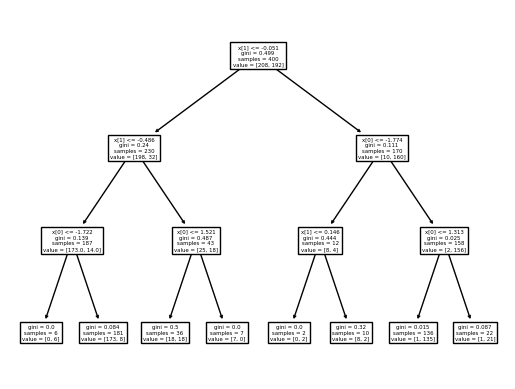

In [40]:
from sklearn.tree import plot_tree

plot_tree(clf)